# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software


### QP2. Como o desempenho do algoritmo proposto se compara ao de algoritmos da literatura quando aplicados ao DSPSP?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

from dspsp_analysis import (algorithm_dataset, instance_dataset, comparison_dataset, 
                            max_event, metrics_dataset, mean_hypervolume, median_hypervolume)

%matplotlib inline

data = metrics_dataset(filepath="../hypervolume/metrics-nsgaii-debug.csv")
instance_ids = list(data.instance.unique())
algorithm_ids = list(data.algorithm.unique())

In [2]:
instance_datasets = {}
for inst in instance_ids:
    ds = instance_dataset(data, inst, zero_values=True)
    instance_datasets[inst] = {alg: algorithm_dataset(ds, alg, zero_values=True) for alg in algorithm_ids}

In [3]:
comparison_datasets = {}
for inst in instance_ids:
    comparison_datasets[inst] = {alg: comparison_dataset(instance_datasets[inst][alg]) for alg in algorithm_ids}


In [4]:
for inst in instance_ids:
    min_event = min([max_event(ds) for ds in comparison_datasets[inst].values()])
    for k in comparison_datasets[inst].keys():
        comparison_datasets[inst][k] = comparison_datasets[inst][k][:min_event+1]
        

In [31]:
cmp = mean_hypervolume(data)
cmp = cmp.reset_index()
cmp

,instance,algorithm,mean,std
0,ST10_DT10_E5_SK4-5,NSGAII-v1,0.181267,0.421255
1,ST10_DT10_E5_SK4-5,NSGAII-v2,0.668134,0.416010
2,ST10_DT10_E5_SK4-5,NSGAII-v3,0.710473,0.448105
3,ST10_DT10_E5_SK4-5,NSGAIIDynamic-v3,0.681946,0.417280


#### Gráficos comparativos

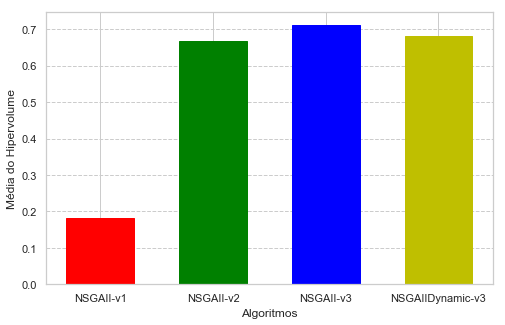

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))
bars = plt.bar(cmp['algorithm'], cmp["mean"], align='center', width=0.6)
for bar, c in zip(bars, "rgby"):
    bar.set_color(c)
ax.set_xticks(index)
ax.set_xticklabels(cmp_labels)
plt.grid(axis="y", linestyle="dashed")
plt.xlabel("Algoritmos")
plt.ylabel("Média do Hipervolume")
plt.show()


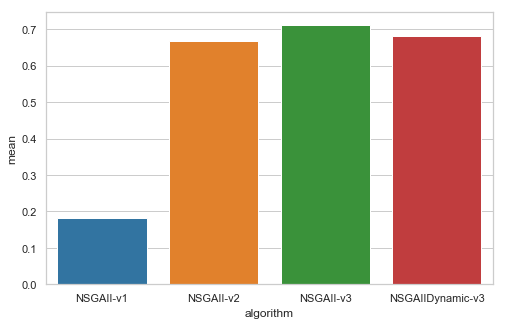

In [35]:
sns.set_style("whitegrid")
# https://seaborn.pydata.org/tutorial/aesthetics.html?highlight=image%20size#scaling-plot-elements
sns.set_context("notebook")
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(ax=ax, x="algorithm", y="mean", data=cmp)